In [1]:
import sys
from pathlib import Path
print(sys.path)

['/nfs/primary/MSRCall/DPAnalyzer/exp', '/opt/miniconda3/lib/python310.zip', '/opt/miniconda3/lib/python3.10', '/opt/miniconda3/lib/python3.10/lib-dynload', '', '/opt/miniconda3/lib/python3.10/site-packages']


In [2]:
sys.path.insert(0, Path(sys.path[0]).parent.as_posix())

In [4]:
from lxml import etree
from cent import between_cent, degree_cent, eigen_cent
import logging
from pathlib import Path

logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s [%(levelname)s]: %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S'
                )
logger = logging.getLogger(__name__)
file_handler = logging.FileHandler('cent_cal_notebook.log')
file_handler.setLevel(logging.DEBUG)
file_formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(file_formatter)
logger.addHandler(file_handler)



In [5]:

def parse_graphml_in_chunks(file_path):
    context = etree.iterparse(file_path, events=("start", "end"))
    nodes = {}
    edges = []
    
    for event, elem in context:
        if event == "end" and elem.tag == "{http://graphml.graphdrawing.org/xmlns}node":
            # Process node
            node_id = elem.attrib['id']
            # Extract other attributes if needed, e.g. CVE_Severity
            attributes = {data.attrib['key']: data.text for data in elem.findall("{http://graphml.graphdrawing.org/xmlns}data")}
            nodes[node_id] = attributes
            elem.clear()  # Clear memory

        elif event == "end" and elem.tag == "{http://graphml.graphdrawing.org/xmlns}edge":
            # Process edge
            source = elem.attrib['source']
            target = elem.attrib['target']
            # Extract edge attributes
            attributes = {data.attrib['key']: data.text for data in elem.findall("{http://graphml.graphdrawing.org/xmlns}data")}
            edges.append((source, target, attributes))
            elem.clear()  # Clear memory
            
    return nodes, edges

# Usage
nodes, edges = parse_graphml_in_chunks('../data/graph_metric.graphml')

## Calculate the degree centrality

In [6]:
# ------ calculate the degree_centrality ------
top_degree_cel = degree_cent.cal_degree_centrality(nodes, edges)
logger.info(f"the top 10 nodes with highest degree centrality are: {top_degree_cel}")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



## Calculate the betweenness centrality

In [ ]:
betcenter = between_cent.BetCent(nodes, edges)
top_between_cel = betcenter.cal_between_cent()
logger.info(f"the top 10 nodes with highest betweenness centrality are: {top_between_cel}")


## Calculate the Eigenvector Centrality

In [1]:

att_features = ["freshness", "popularity", "speed", "severity"]

eigencenter = eigen_cent.EigenCent(nodes, edges, att_features)
# process node attribute values to right format
eigencenter._quan_attrs()
eigencenter._covt_df()

eigencenter._step_wise_reg(0.05, att_features)
# analyse processed attributes
eigencenter._weight_ana()

# get the eigen centrality
top_eigen_nodes = eigencenter.cal_weighted_eigen_cent(nodes)
logger.info(f"the top 10 nodes with highest eigen centrality are: {top_eigen_nodes}")


NameError: name 'eigen_cent' is not defined

## measure the basic centrality

In [12]:
# measurement on original graph
top_degree_cel =[('junit:junit', 2776187), ('org.slf4j:slf4j-api', 1966542), ('org.mockito:mockito-core', 1716650), ('org.scala-lang:scala-library', 1579004), ('org.assertj:assertj-core', 1098655), ('ch.qos.logback:logback-classic', 888778), ('com.google.guava:guava', 870442), ('com.fasterxml.jackson.core:jackson-databind', 860781), ('org.hamcrest:hamcrest-all', 701639), ('org.projectlombok:lombok', 667337)]
top_between_cel = [('com.splendo.kaluga:alerts-androidlib', 0), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core', 0), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent', 0), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.111', 0), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent:1.0.0-M4', 0), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent:1.0.0-M3', 0), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.113', 0), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.112', 0), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.115', 0), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent:1.0.0-M2', 0)]
top_eigen_cel = [('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.111', 0.00017971229167370245), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent:1.0.0-M4', 0.00017971229167370245), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent:1.0.0-M3', 0.00017971229167370245), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.113', 0.00017971229167370245), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.112', 0.00017971229167370245), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.115', 0.00017971229167370245), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent:1.0.0-M2', 0.00017971229167370245), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent:1.0.0-M6', 0.00017971229167370245), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.114', 0.00017971229167370245), ('com.splendo.kaluga:alerts-androidlib:0.5.0', 0.00017971229167370245)]

In [ ]:
# measurement on new dependency graph based on releases


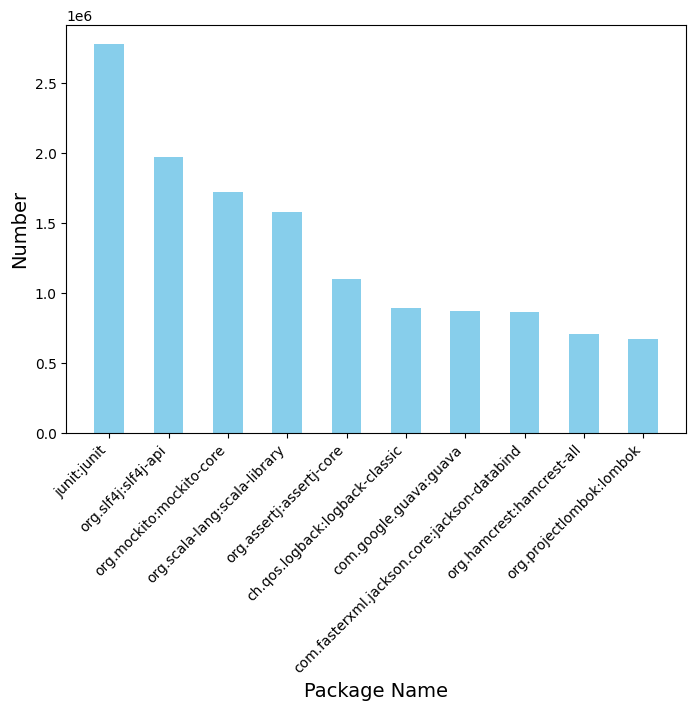

In [1]:
import matplotlib.pyplot as plt

# Data
top_degree_cel = [
    ('junit:junit', 2776187), 
    ('org.slf4j:slf4j-api', 1966542), 
    ('org.mockito:mockito-core', 1716650), 
    ('org.scala-lang:scala-library', 1579004), 
    ('org.assertj:assertj-core', 1098655), 
    ('ch.qos.logback:logback-classic', 888778), 
    ('com.google.guava:guava', 870442), 
    ('com.fasterxml.jackson.core:jackson-databind', 860781), 
    ('org.hamcrest:hamcrest-all', 701639), 
    ('org.projectlombok:lombok', 667337)
]

# Extract package names and corresponding values
packages, values = zip(*top_degree_cel)

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(packages, values, color='skyblue', width=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
# plt.title('Top Degree Centrality of Packages', fontsize=14)
plt.xlabel('Package Name', fontsize=14)
plt.ylabel('Number', fontsize=14)

# Show the plot
plt.subplots_adjust(bottom=0.2)
plt.show()


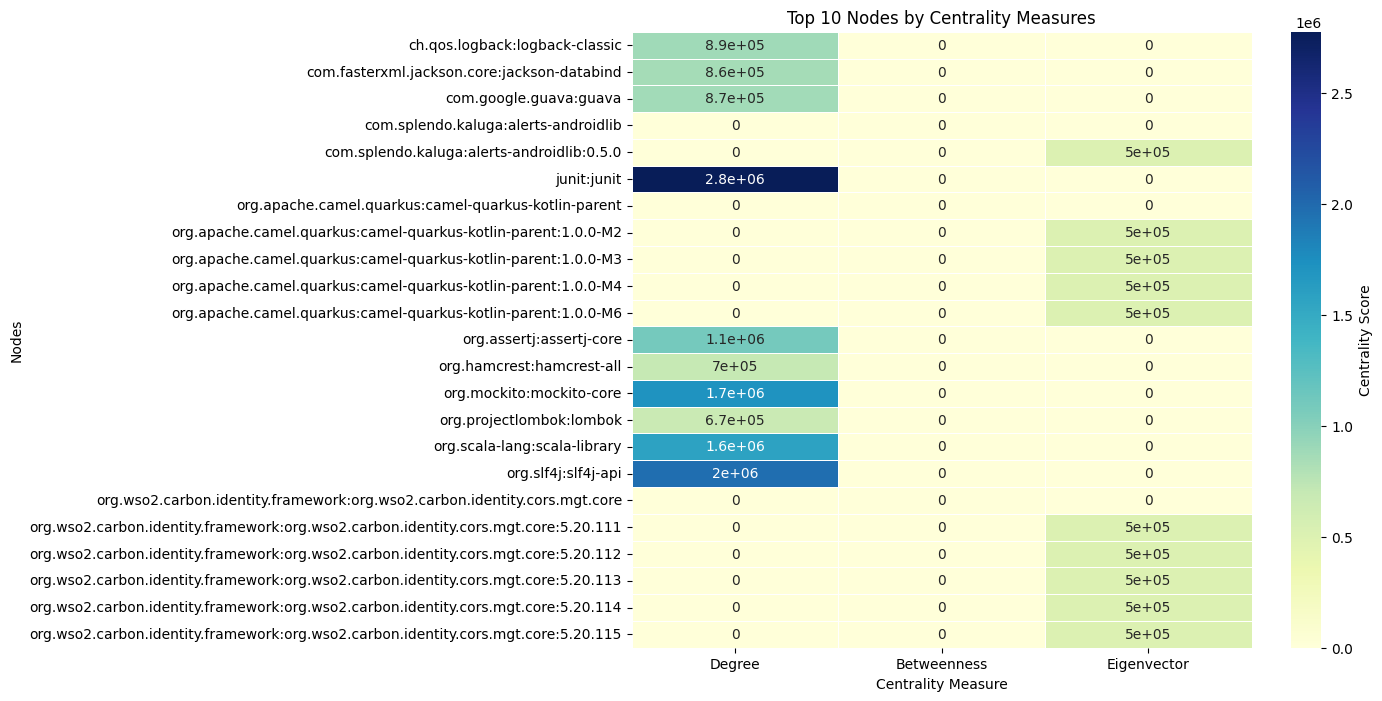

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert lists of tuples into dictionaries
degree_dict = dict(top_degree_cel)
betweenness_dict = dict(top_between_cel)
eigenvector_dict = dict(top_eigen_cel)

# Collect all unique nodes and sort them
all_nodes = sorted(set(degree_dict) | set(betweenness_dict) | set(eigenvector_dict))

# Create a DataFrame with nodes as rows and centralities as columns
data = pd.DataFrame({
    'Degree': [degree_dict.get(node, 0) for node in all_nodes],
    'Betweenness': [betweenness_dict.get(node, 0) for node in all_nodes],
    'Eigenvector': [eigenvector_dict.get(node, 0)*2776187000 for node in all_nodes]
}, index=all_nodes)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Centrality Score'}, linewidths=0.5)

# Add labels and title
plt.title('Top 10 Nodes by Centrality Measures')
plt.xlabel('Centrality Measure')
plt.ylabel('Nodes')
plt.show()

In [14]:
import numpy as np

def standardize_centralities(centralities):
    names, values = zip(*centralities)
    values = np.array(values, dtype=float)  # Convert to float for standardization
    
    # Standardize: (value - mean) / std
    mean = np.mean(values)
    std_dev = np.std(values)
    
    # Handle case where std_dev is 0 to avoid division by zero
    if std_dev > 0:
        standardized_values = (values - mean) / std_dev
    else:
        standardized_values = values - mean  # Only centering if std_dev is 0
    
    # Return as list of tuples (name, standardized_value)
    return list(zip(names, standardized_values))

# Example usage
top_degree_standardized = standardize_centralities(top_degree_cel)
top_between_standardized = standardize_centralities(top_between_cel)
top_eigen_standardized = standardize_centralities(top_eigen_cel)


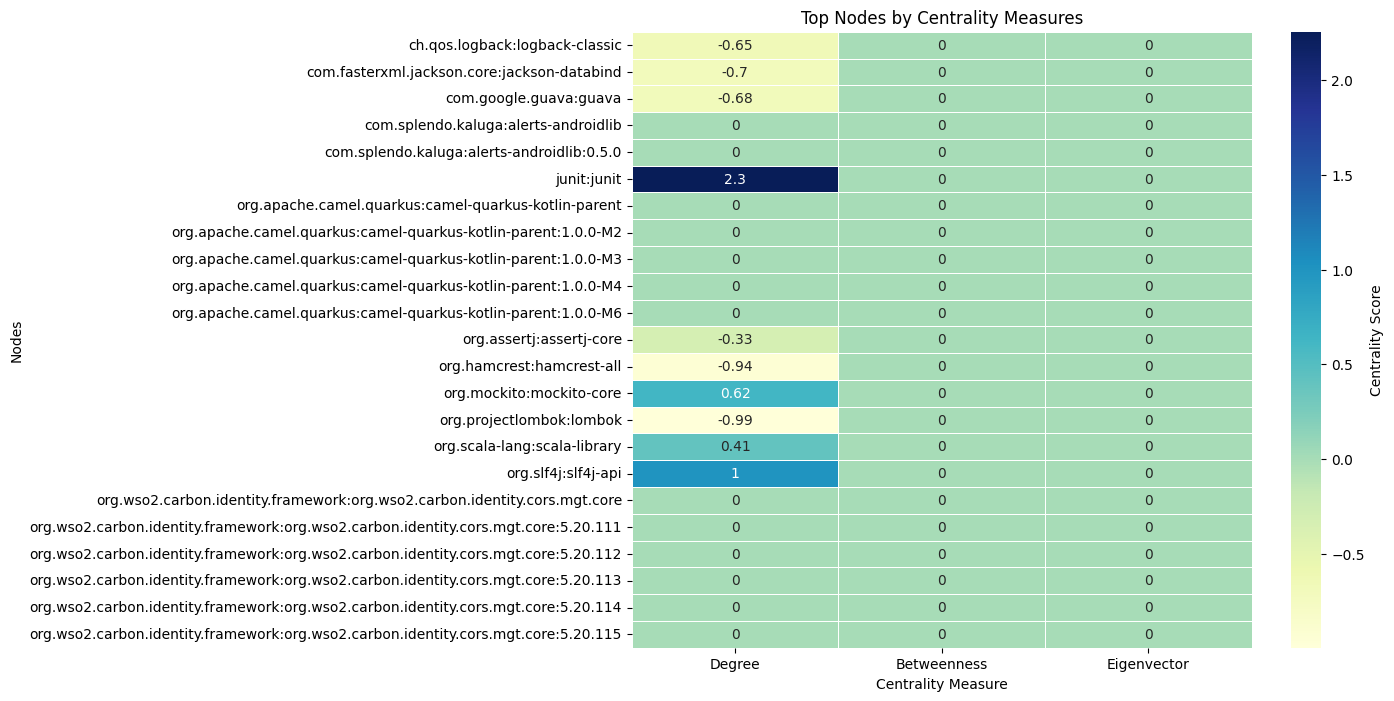

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert lists of tuples into dictionaries
degree_dict = dict(top_degree_standardized)
betweenness_dict = dict(top_between_standardized)
eigenvector_dict = dict(top_eigen_standardized)

# Collect all unique nodes and sort them
all_nodes = sorted(set(degree_dict) | set(betweenness_dict) | set(eigenvector_dict))

# Create a DataFrame with nodes as rows and centralities as columns
data = pd.DataFrame({
    'Degree': [degree_dict.get(node, 0) for node in all_nodes],
    'Betweenness': [betweenness_dict.get(node, 0) for node in all_nodes],
    'Eigenvector': [eigenvector_dict.get(node, 0) for node in all_nodes]
}, index=all_nodes)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Centrality Score'}, linewidths=0.5)

# Add labels and title
plt.title('Top Nodes by Centrality Measures')
plt.xlabel('Centrality Measure')
plt.ylabel('Nodes')
plt.show()

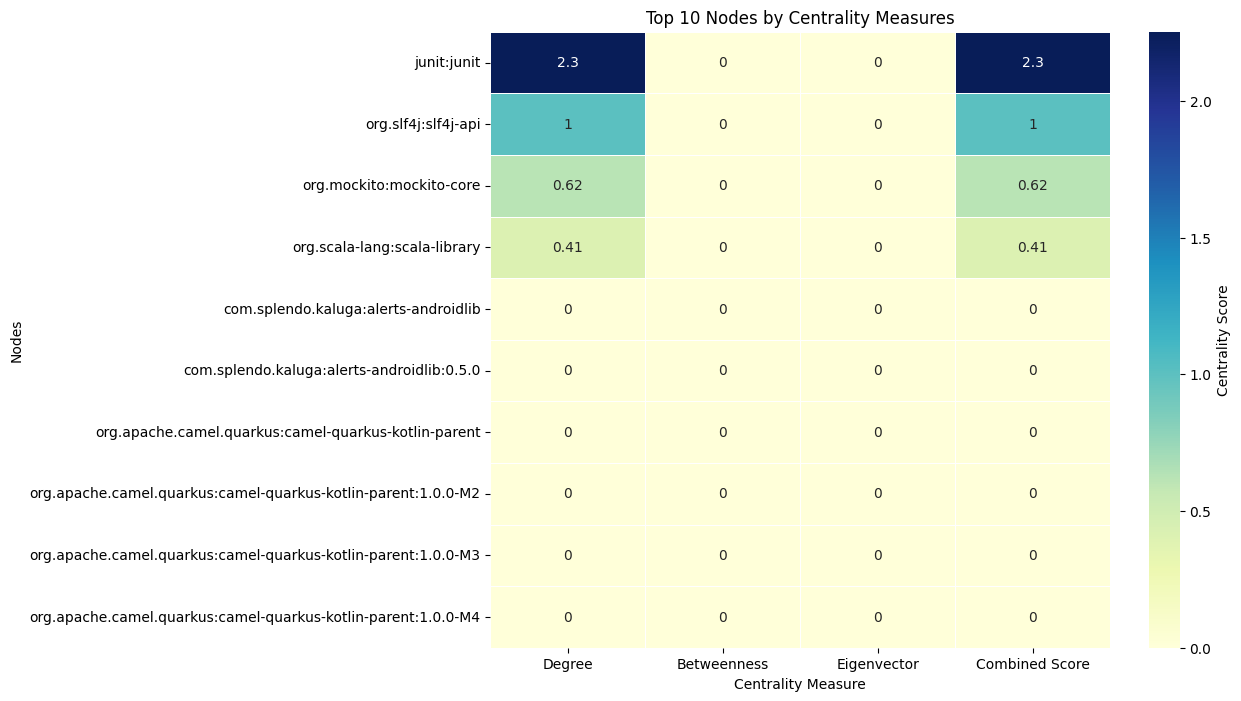

Top 10 Nodes by Combined Centrality Score:
                                                      Degree  Betweenness  \
junit:junit                                         2.253368          0.0   
org.slf4j:slf4j-api                                 1.006821          0.0   
org.mockito:mockito-core                            0.622082          0.0   
org.scala-lang:scala-library                        0.410159          0.0   
com.splendo.kaluga:alerts-androidlib                0.000000          0.0   
com.splendo.kaluga:alerts-androidlib:0.5.0          0.000000          0.0   
org.apache.camel.quarkus:camel-quarkus-kotlin-p...  0.000000          0.0   
org.apache.camel.quarkus:camel-quarkus-kotlin-p...  0.000000          0.0   
org.apache.camel.quarkus:camel-quarkus-kotlin-p...  0.000000          0.0   
org.apache.camel.quarkus:camel-quarkus-kotlin-p...  0.000000          0.0   

                                                    Eigenvector  \
junit:junit                               

In [16]:
# Convert lists of tuples into dictionaries
degree_dict = dict(top_degree_standardized)
betweenness_dict = dict(top_between_standardized)
eigenvector_dict = dict(top_eigen_standardized)

# Collect all unique nodes and sort them
all_nodes = sorted(set(degree_dict) | set(betweenness_dict) | set(eigenvector_dict))

# Create a DataFrame with nodes as rows and centralities as columns
data = pd.DataFrame({
    'Degree': [degree_dict.get(node, 0) for node in all_nodes],
    'Betweenness': [betweenness_dict.get(node, 0) for node in all_nodes],
    'Eigenvector': [eigenvector_dict.get(node, 0) for node in all_nodes]
}, index=all_nodes)

# Compute a combined score (e.g., sum of scores)
data['Combined Score'] = data.sum(axis=1)

# Sort by the combined score and take the top 10
top_10_nodes = data.nlargest(10, 'Combined Score')

# Plot the heatmap for top 10 nodes
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_nodes, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Centrality Score'}, linewidths=0.5)

# Add labels and title
plt.title('Top 10 Nodes by Centrality Measures')
plt.xlabel('Centrality Measure')
plt.ylabel('Nodes')
plt.show()

# Display the top 10 nodes
print("Top 10 Nodes by Combined Centrality Score:")
print(top_10_nodes)